In [1]:
from CentralStreamingModel.biskewn import skewnormal as sn
from CentralStreamingModel.gaussian import gsm
from CentralStreamingModel.biskewt import skewtfit as sf
import CentralStreamingModel.biskewt.skewt as st
from CentralStreamingModel.utils.read_probabilities import VD
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import seaborn as sns
sns.set_context('talk')

In [16]:
def jointplot( x, y, jointpdf,
              jointpdf_gaussian,
              jointpdf_skewn,
              jointpdf_skewt,
              log=False, cbar = None, 
              cbar_plot=False):
    '''

    Plots the joint PDF of two random variables together with its marginals
        Args:
            x and y, random variables,
            jointpdf, their joint PDF

    '''
    levels = np.linspace(-7.,-1.,10)
    marginals_color = 'darkblue'
    nullfmt = NullFormatter()         # no labels
    # definitions for the axes
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.02

    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.2]
    rect_histy = [left_h, bottom, 0.2, height]

    # start with a rectangular Figure
    fig = plt.figure(1, figsize=(8, 8))

    axScatter = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # the scatter plot:
    if(log == True):
        scatter = axScatter.contourf(x, y, np.log10(jointpdf), 
                                     levels=levels)
        colors = ['forestgreen'] * len(levels)
        scatter = axScatter.contour(x, y, np.log10(jointpdf_gaussian),
                                    levels=levels, colors = colors,
                                   linestyles='dashed')
        colors = ['indianred'] * len(levels)
        scatter = axScatter.contour(x, y, np.log10(jointpdf_skewt),
                                    levels=levels, colors = colors,
                                   linestyles='dashed')
        #colors = ['steelblue'] * len(levels)
        #scatter = axScatter.contour(x, y, np.log10(jointpdf_skewn),
        #                            colors=colors,levels=levels)

    else:
        scatter = axScatter.contourf(x, y, jointpdf, levels=levels)


    axScatter.set_xlim(-20,20)
    axScatter.set_ylim(-20,20)

    axHistx.semilogy(y, abs(y[1] - y[0]) * np.sum(jointpdf, axis=0), 
                 color = marginals_color, linewidth=2,marker='o',
                markersize=3, linestyle='')

    axHistx.semilogy(y, abs(y[1] - y[0]) * np.sum(jointpdf_skewt, axis=0), 
                 linewidth=2,
                linestyle='-', color = 'indianred')
    
    #axHistx.semilogy(y, abs(y[1] - y[0]) * np.sum(jointpdf_skewn, axis=0), 
    #             linewidth=2,
    #           linestyle='-', color = 'steelblue')
    axHistx.semilogy(y, abs(y[1] - y[0]) * np.sum(jointpdf_gaussian, axis=0), 
                linewidth=2,
                linestyle='-', color = 'forestgreen')
    
    axHisty.semilogx(abs(x[1] - x[0]) * np.sum(jointpdf, axis=-1), x,
                 color= marginals_color,marker='o',
                markersize=3, linestyle='')
    
    axHisty.semilogx(abs(x[1] - x[0]) * np.sum(jointpdf_skewt, axis=-1), x,
                 color= 'indianred', linewidth=2,
                 linestyle='-')
    
    #axHisty.semilogx(abs(x[1] - x[0]) * np.sum(jointpdf_skewn, axis=-1), x,
    #             color= 'steelblue', linewidth=2,
    #            linestyle='-')
    
    axHisty.semilogx(abs(x[1] - x[0]) * np.sum(jointpdf_gaussian, axis=-1), x,
                 color= 'forestgreen', linewidth=2,
                linestyle='-')
    
    #axHistx.grid()
    #axHisty.grid()
    
    axScatter.set_xlabel(r'$v_r$ [Mpc/h]')
    axScatter.set_ylabel(r'$v_t$ [Mpc/h]')
    
    axHistx.set_ylim(1e-6,4e-1)
    axHistx.set_xlim(-20,20)
    
    
    if cbar_plot:
        cbar = fig.colorbar(scatter, anchor=(0.4,0.0))
        cbar.set_label('$log_{10}[\mathcal{P}(v_r, v_t | r)]$') 

    axHistx.set_ylabel(r'$\mathcal{P}(v_r | r)$')
    axHisty.set_xlabel(r'$\mathcal{P}(v_t |r)$')
    axHisty.set_xlim(1e-6,4e-1)
    axHisty.set_ylim(-20,20)

    
    #plt.show()
    
    if cbar == None:
        return cbar

In [5]:
boxsize = 2000
box = 1
snapshot = 20

measured = VD('halos',box, boxsize, snapshot)


In [6]:
v_r = measured.v.r
v_t = measured.v.t
v = np.array(np.meshgrid(v_r, v_t)).T.reshape(-1,2)

In [7]:
skewt_popt, pcov = sf.radial_tangential_skewtfit(measured.r,
                v_r, v_t, measured.jointpdf, log=False)

/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:17: RuntimeWarning: invalid value encountered in power
  postfactor = (1. + Q/dof)**(-(dof + 2.)/2.)
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:24: RuntimeWarning: invalid value encountered in sqrt
  return alpha * ( (v[:,1] - vr_c) / np.sqrt(w_r)) * ((dof + 2)/(Q + dof)) ** 0.5
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0
/home/c-cuesta/CentralStreamingModel/biskewt/skewt.py:15: RuntimeWarning: inv

In [8]:
rbin = 70

gaussian = gsm.gaussian_rt_pdf(v, measured.mean.r[rbin], measured.std.r[rbin],
                   measured.std.t[rbin]).reshape(v_r.shape[0], v_t.shape[0])

skewgaussian = sn.skewnormal_given_moments(v, measured.mean.r[rbin],
                    measured.std.r[rbin],
                   measured.std.t[rbin],
        measured.skewness.r[rbin]).reshape(v_r.shape[0], v_t.shape[0])

skewt= st.skewt(v, *skewt_popt[rbin]).reshape(v_r.shape[0], v_t.shape[0])

/home/c-cuesta/CentralStreamingModel/biskewn/skewnormal.py:40: RuntimeWarning: invalid value encountered in power
  func = lambda delta : skewness - (4. - np.pi)/2 *(delta * np.sqrt(2/np.pi))**3 / (1 - 2*delta**2/np.pi)**(3/2)


3.2130654064718387
r $\in$ (5, 6) Mpc/h


/home/c-cuesta/.conda/envs/carol/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log10


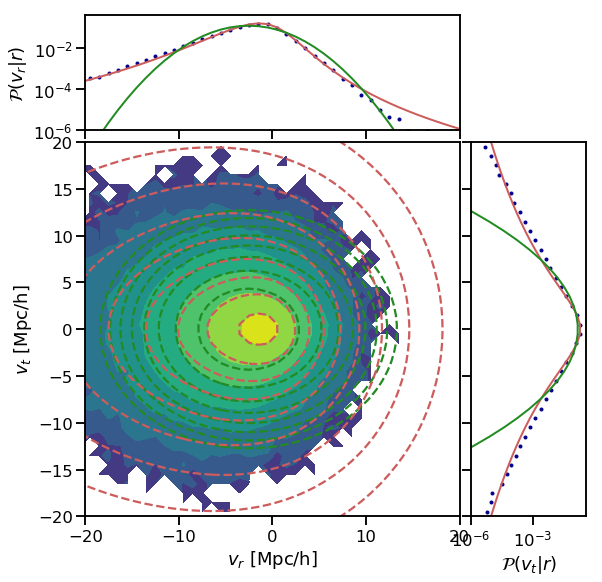

3.8256684822285054
r $\in$ (20, 21) Mpc/h


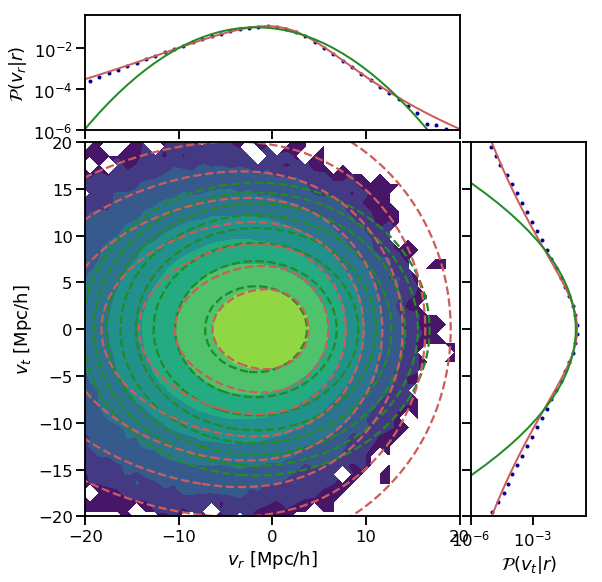

4.507969498341919
r $\in$ (70, 71) Mpc/h


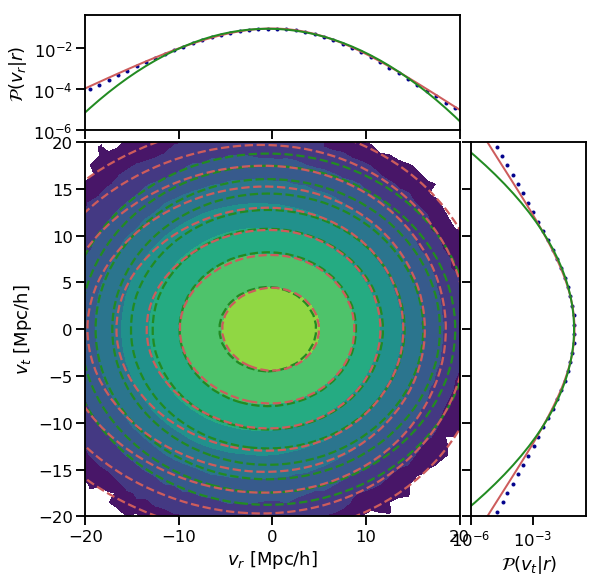

In [17]:
rbins = [5,20,70]
tricked_popt = skewt_popt.copy()

for rbin in rbins:
    
    print(measured.std.r[rbin])
    
    gaussian = gsm.gaussian_rt_pdf(v, measured.mean.r[rbin], measured.std.r[rbin],
                       measured.std.t[rbin]).reshape(v_r.shape[0], v_t.shape[0])

    skewgaussian = sn.skewnormal_given_moments(v, measured.mean.r[rbin],
                        measured.std.r[rbin],
                       measured.std.t[rbin],
            measured.skewness.r[rbin]).reshape(v_r.shape[0], v_t.shape[0])

    tricked_popt[rbin, -1] = skewt_popt[rbin, -1] + 2
    skewt= st.skewt(v, *tricked_popt[rbin]).reshape(v_r.shape[0], v_t.shape[0])
    
    print(f'r $\in$ ({rbin}, {rbin+1}) Mpc/h')
    jointplot( v_r, v_t, measured.jointpdf[rbin],
                  gaussian,
                  skewgaussian,
                  skewt, log = True)
    plt.show()